# Loteca

In [77]:
import keras
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

### Ler arquivo

In [78]:
# df = np.load('arquivo.npy')

In [79]:
# Define o ganhador H = casa, A = Vizitante, D = empate
# for i in range(len(df)):
#     df[i,8] = 'H' if (int(df[i,2]) - int(df[i,6])) > 0 else 'A' if (int(df[i,2]) - int(df[i,6])) < 0 else 'D'

In [80]:
# Cria um data frame para receber os valores
# df_ = pd.DataFrame(df,columns=['Concurso','Jogo','HG','Home','S','Away','AG','Dia','Res'])

In [81]:
# Transforma as colunas de gols em inteiros
# df_ = df_.astype({"HG": int, "AG": int})

In [82]:
# df_.head()

### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

In [83]:
# plt.bar(df_['Res'].value_counts().keys(),df_['Res'].value_counts())

### Média de gols dos últimos jogos

In [84]:
# Calcula a soma de gols feitos das ultimas n (window) partidas
# def get_rolling_goals(dataFrame, equip, pos, window, HG_AG):   
#     HA = 'Home' if HG_AG == 'HG' else 'Away' if HG_AG == 'AG' else ''
#     s = dataFrame[:pos][dataFrame[HA] == equip][HG_AG][-window:].sum()
#     return s if not(np.isnan(s)) else 0

# Calcula a soma de gols recebidos das ultimas n (window) partidas
# def get_rolling_received(dataFrame, equip, pos, window, HG_AG):   
#     HA = 'Home' if HG_AG == 'HG' else 'Away' if HG_AG == 'AG' else ''
#     HG_AG_ = 'HG' if HG_AG == 'AG' else 'AG' if HG_AG == 'HG' else ''
#     s = dataFrame[:pos][dataFrame[HA] == equip][HG_AG_][-window:].sum()
#     return s if not(np.isnan(s)) else 0

    

In [85]:
# dfg = []
# for idx, row in df_.iterrows():
#     row['H_Goals_Scored'] = get_rolling_goals(df_, row['Home'], idx, 20, 'HG')
#     row['A_Goals_Scored'] = get_rolling_goals(df_, row['Away'], idx, 20, 'AG')
#     row['H_Goals_Against'] = get_rolling_received(df_, row['Home'], idx, 20, 'HG')
#     row['A_Goals_Against'] = get_rolling_received(df_, row['Away'], idx, 20, 'AG')
#     dfg.append(row)
    
    
    
    

In [86]:
# dfgs = pd.DataFrame(dfg)

In [87]:
# dfgs[dfgs['Concurso']=='Concurso 800 (21/05/2018)']

In [88]:
# dfgs.to_csv('arquivo_loteca1.csv')

In [89]:
df_ = pd.read_csv('arquivo_loteca1.csv')

In [90]:
df_.head()

,Unnamed: 0,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res,H_Goals_Scored,A_Goals_Scored,H_Goals_Against,A_Goals_Against
0,0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A,0,0,0,0
1,1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H,0,0,0,0
2,2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H,0,0,0,0
3,3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A,0,0,0,0
4,4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H,0,0,0,0


### Nomes dos times

In [91]:
# Cria uma lista de nomes dos times
vocab = np.unique(np.concatenate((np.array(df_['Home'].unique()), np.array(df_['Away'].unique()))))

In [92]:
# Cria o indice de times
word2idx = {word: i for i, word in enumerate(vocab)}

In [93]:
# Retorna o indice de um time:
def word2vector(word):
    m = np.zeros(len(word2idx))
    idx = word2idx.get(word)
    if idx == '':
        raise ValueError('Time não encontrado no indice: ' + word)

    m[word2idx.get(word)] = 1
    return m

In [94]:
# Transforma os dois times em um vetor com o flag do time correspondente e a média de gols
def prepare(H,A):
    
    vector = []
    
    for x in word2vector(H):
        if math.isnan(x):
            raise ValueError('Time não encontrado no indice: ' + H)

        vector.append(x)
        
    for x in word2vector(A):
        if math.isnan(x):
            raise ValueError('Time não encontrado no indice: ' + A)
            
        vector.append(x)
                

#     Cálculo das médias de gols
#     vector.append(get_rolling_goals(df_, H, pos, 10, 'HG'))
#     vector.append(get_rolling_goals(df_, A, pos, 10, 'AG'))
    
#     vector.append(get_rolling_received(df_, H, pos, 10, 'HG'))
#     vector.append(get_rolling_received(df_, A, pos, 10, 'AG'))

    

    return vector

### Indexar os resultados

In [95]:
X = []
y = []

for ind_, row in df_.iterrows():
    
    vec = [word2vector(row['Home']), word2vector(row['Away'])]
    
    vec = np.array(vec).reshape(np.array(vec).shape[1]*2)
    
#     vec = np.append(vec, row['H_Goals_Scored'])
#     vec = np.append(vec, row['A_Goals_Scored'])
    
    
    X.append(vec)        
    
    ry = [1,0,0] if int(row['HG']) > int(row['AG']) else \
    [0,1,0] if int(row['HG']) == int(row['AG']) else \
    [0,0,1] if int(row['HG']) < int(row['AG']) else [0,0,0]

    y.append(ry)

y = np.array(y).reshape(np.array(y).shape[0],3)

X = np.array(X)

# Normalizar gols
# X[:,-4:-3] = X[:,-4:-3]/X[:,-4:-3].max()
# X[:,-3:-2] = X[:,-3:-2]/X[:,-3:-2].max()
# X[:,-2:-1] = X[:,-2:-1]/X[:,-2:-1].max()
# X[:,-1:] = X[:,-1:]/X[:,-1:].max()



### Modelo

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, TimeDistributed
from keras.layers import Embedding, Activation
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64))  # return a single vector of dimension 32model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Separar os datasets de treinamento e teste

In [97]:
xin = []
frame_size = 50
for i in range(X.shape[0]):
    
    x_=(X[i-frame_size:i])
    
    xin.append(x_)
    
    
    

xin = np.array(xin[frame_size:])
yin = y[frame_size:]


In [98]:
xin.shape

(11510, 50, 1828)

In [99]:
split = 40

In [100]:
X_train, y_train, X_test, y_test = xin[:-int(xin.shape[0]/split)], yin[:-int(yin.shape[0]/split)], xin[-int(xin.shape[0]/split):], yin[-int(yin.shape[0]/split):],

### Treinar o modelo

In [101]:
history = model.fit(X_train, y_train, epochs=300, batch_size=500, shuffle=True)

Epoch 1/300
11223/11223 [==============================] - 26s 2ms/step - loss: 0.6149 - acc: 0.6674
Epoch 2/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.6106 - acc: 0.6707
Epoch 3/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.6088 - acc: 0.6717
Epoch 4/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.6048 - acc: 0.6791
Epoch 5/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.6004 - acc: 0.6822
Epoch 6/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.5972 - acc: 0.6867
Epoch 7/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.5935 - acc: 0.6892
Epoch 8/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.5911 - acc: 0.6897
Epoch 9/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.5891 - acc: 0.6916
Epoch 10/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.5859 - a

11223/11223 [==============================] - 16s 1ms/step - loss: 0.4207 - acc: 0.7881
Epoch 82/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4134 - acc: 0.7922
Epoch 83/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4113 - acc: 0.7936
Epoch 84/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4086 - acc: 0.7954
Epoch 85/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4056 - acc: 0.7982
Epoch 86/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4039 - acc: 0.7980
Epoch 87/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.4022 - acc: 0.7986
Epoch 88/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.3983 - acc: 0.8008
Epoch 89/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.3985 - acc: 0.8017
Epoch 90/300
11223/11223 [==============================] - 16s 1ms/step - loss: 0.3933 - acc: 

11223/11223 [==============================] - 17s 2ms/step - loss: 0.2266 - acc: 0.9001
Epoch 161/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2152 - acc: 0.9053
Epoch 162/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2181 - acc: 0.9024
Epoch 163/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2081 - acc: 0.9082
Epoch 164/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2124 - acc: 0.9071
Epoch 165/300
11223/11223 [==============================] - 17s 1ms/step - loss: 0.2142 - acc: 0.9059
Epoch 166/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2030 - acc: 0.9115
Epoch 167/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.2096 - acc: 0.9080
Epoch 168/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.1965 - acc: 0.9142
Epoch 169/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.198

11223/11223 [==============================] - 18s 2ms/step - loss: 0.0722 - acc: 0.9730
Epoch 240/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0912 - acc: 0.9663
Epoch 241/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0776 - acc: 0.9712
Epoch 242/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0832 - acc: 0.9687
Epoch 243/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0784 - acc: 0.9711
Epoch 244/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0718 - acc: 0.9739
Epoch 245/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0775 - acc: 0.9726
Epoch 246/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0794 - acc: 0.9718
Epoch 247/300
11223/11223 [==============================] - 17s 2ms/step - loss: 0.0706 - acc: 0.9755
Epoch 248/300
11223/11223 [==============================] - 17s 1ms/step - loss: 0.075

In [106]:
model.save('model_lstm.h5')

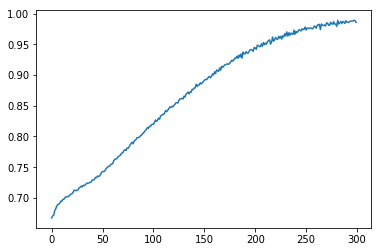

In [102]:
plt.plot(history.history['acc'])

In [104]:
model.evaluate(X_test, 
               y_test, verbose=1)

287/287 [==============================] - 2s 9ms/step


[2.882275353740732, 0.5865273043669059]

### Avaliar precisão

In [124]:
# Cria as colunas com os resultados reais e as apostas
def aposta(dr,p):
    dr['RC1'] = 'X' if dr['HG'] > dr['AG'] else ''
    dr['RCM'] = 'X' if dr['HG'] == dr['AG'] else ''
    dr['RC2'] = 'X' if dr['HG'] < dr['AG'] else ''
    
    
#     Criar apostas com jogos simples, duplos e triplos:
    c=0
    if p[0,0] > p.mean():
        dr['AC1'] = 'X' 
        c += 1
    else:
        dr['AC1'] = ''
    

    if p[0,1] > p.mean():
        dr['ACM'] = 'X' 
        c += 1
    else:
        dr['ACM'] = ''

    if p[0,2] > p.mean():
        dr['AC2'] = 'X' 
        c += 1
    else:
        dr['AC2'] = ''
        
#         Criar marcador de jogos duplos e triplos
    if c==2:
        dr['D']='D'
    else:
        dr['D']=''
    if c==3:
        dr['T']='T'
    else:
        dr['T']=''
        

    return dr
    
    
    

In [105]:
dfx = df_[int(-df_.shape[0]/split):]

ds = []

X_ = X[-int(X.shape[0]/split):]

prec = []

i = 0

y_true = []

y_prec = []

for row in X_test:    

    p = model.predict([[row]])
    
    m = p[0].max()
    
    r = [1,0,0] if p[0,0] == m else [0,1,0] if p[0,1] == m else [0,0,1] if p[0,2] == m else [0,0,0]       
    
    a = 1 if (r == y_test[i]).all() else 0
    
    prec.append(r)   
    
    
    i += 1
    
#     Cria um dataframe com os resultados para report
    ds.append(a)    
    
print(round(((np.mean(ds))) * 100,2), '%')
    

37.98 %


In [160]:
from pandas_ml import ConfusionMatrix

In [164]:
confusion_matrix = ConfusionMatrix(y_true, y_pred)

(289, 3)

In [161]:
confusion_matrix = ConfusionMatrix(y_test, prec)

Exception: Data must be 1-dimensional

In [ ]:
dfs[dfs['Concurso']=='Concurso 825 (05/11/2018)']

In [ ]:
dfs[dfs['S']==dfs['Res']].groupby(['Concurso'])['Concurso'].value_counts()

In [ ]:
# Considera os duplos e triplos
# RC1	RCM	RC2	AC1	ACM	AC2
dfs[((dfs['RC1']==dfs['AC1'])&(dfs['RC1']=='X')) | ((dfs['RC2']==dfs['AC2'])&(dfs['RC2']=='X')) | ((dfs['RCM']==dfs['ACM'])&(dfs['RCM']=='X'))].groupby(['Concurso'])['Concurso'].value_counts()

In [ ]:
# Preço das apostas
2**dfs[dfs['D']=='D'].groupby(['Concurso'])['Concurso'].value_counts()

### Lista de times

In [ ]:
vocab

### Realizar previsão

In [ ]:
H = 'LIVERPOOL/ING'
A = 'TOTTENHAM/ING'

prep = [prepare(H,A,1)]
    
prepx = np.array(prep).reshape(np.array(prep).shape[0],np.array(prep).shape[1])
    
p = model.predict(prepx)


print(p)


In [ ]:
p[0,2]

In [ ]:
p.mean()